In [1]:
from args import *
from model_head import *
from dataloader_COCO2017 import *

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from PIL import ImageSequence


to_pil = transforms.ToPILImage()

model = UNetDesigner(d1=PARAMETERS['d1'],
                     d2=PARAMETERS['d2'],
                     d3=PARAMETERS['d3'],
                     d4=PARAMETERS['d4'],
                     b_=PARAMETERS['b_'],
                     u4=PARAMETERS['u4'],
                     u3=PARAMETERS['u3'],
                     u2=PARAMETERS['u2'],
                     u1=PARAMETERS['u1']
                     )

DEVICE = "cuda:1"
device = torch.device(DEVICE if torch.cuda.is_available() else "cpu")
device
model = model.to(device)

model.load_state_dict(torch.load('weights/weights.pth'))

<All keys matched successfully>

In [2]:
import os
import numpy as np

from PIL import Image
import scipy.ndimage.morphology as morph

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
                              transforms.Resize((INPUT_SIZE, INPUT_SIZE), interpolation = 0),
                              transforms.ToTensor()
                              ])

to_tensor = transforms.ToTensor()

In [3]:
FOLDER_TEST = "../r_unet/data/test_coco"
FILE_NAMES_TEST = sorted(os.listdir('../r_unet/data/test_coco'))
# FILE_NAMES

In [4]:
class TestMedData(Dataset):
    def __init__(self):
        super().__init__
        self.folder_test = FOLDER_TEST
        self.file_names = FILE_NAMES_TEST

    def __getitem__(self, idx):
        img = Image.open(self.folder_test + '/' + self.file_names[idx]).convert('RGB')
        tensor = transform(img)
        return tensor, img

    def __len__(self):
        return len(self.file_names)

In [5]:
dataset = TestMedData()

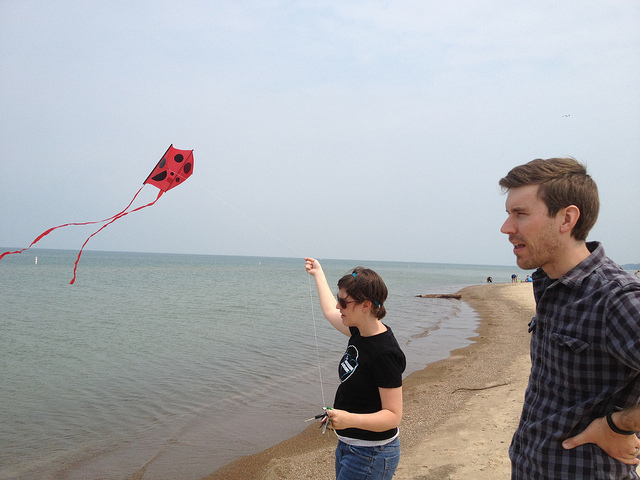

In [6]:
x, y = dataset[2]
y

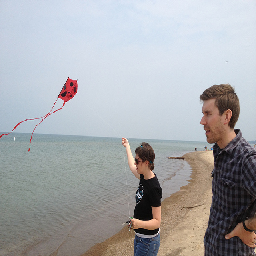

In [7]:
to_pil(x)

In [8]:
out = model(x.to(device))

In [9]:
len(out[0])

2

In [10]:
def showw(object, i):
    imgs = object[0].cpu()
    img = imgs[i]
    #img = (img > 0.3).float()
    return to_pil(img)

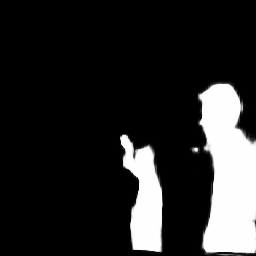

In [12]:
showw(out, 1)

In [13]:
index = 1
for i in range(len(out[0])):
    test_out = showw(out, i)
    test_out.save("../r_unet/data/test_coco_output/class_%d.png" % index)
    index += 1

In [14]:
for i in range(len(out[0])):
    print(i)
    print(out[0][i])

0
tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.9967, 0.9968, 0.9987,  ..., 0.6678, 0.8700, 0.7289],
        [0.9999, 1.0000, 1.0000,  ..., 0.8605, 0.9430, 0.9368],
        [0.9998, 0.9998, 1.0000,  ..., 0.9579, 0.9723, 0.9795]],
       device='cuda:1', grad_fn=<SelectBackward>)
1
tensor([[1.7941e-09, 3.5282e-11, 1.0053e-11,  ..., 1.6346e-07, 1.1461e-07,
         3.1242e-06],
        [4.9321e-11, 1.9450e-13, 1.2689e-13,  ..., 2.2126e-08, 4.0318e-09,
         2.9240e-06],
        [1.8643e-11, 6.5290e-14, 4.7255e-13,  ..., 4.3332e-07, 2.2460e-08,
         1.5606e-06],
        ...,
        [2.2385e-04, 4.4387e-04, 8.3972e-05,  ..., 3.4605e-01, 5.9075e-02,
         2.0228e-01],
        [3.3972e-06, 2.0378e-06, 2.9629e-07,  ..., 8.6442e-02, 2.4970e-02,
         2.8326e-02],
        [1.0273e-05, 2.0649e-05, 1.2781e-06,  ...,

In [15]:
print(out[0][0][70])

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

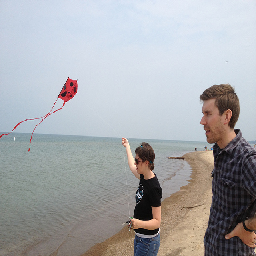

In [17]:
to_pil(x)

0


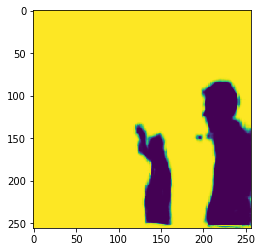

1


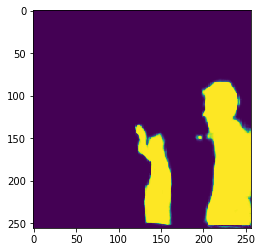

2


IndexError: index 2 is out of bounds for dimension 0 with size 2

In [18]:
%matplotlib inline
for i in range(182):
    print(i)
    imshow(out[0][i].detach().cpu())
    plt.show()